Celem projektu jest opracowanie sieci neuronowej która będzie optymalnie przypisywać przynależności do klas zdjęć planktonu z oetykietowanego datasetu wrzuconego na kaggle z okazji konkursu 'National Data Science Bowl' w 2015 roku. W tym pliku zapoznaje się z danymi i augmentacją

Dane wejściowe: obrazki planktonu                                             
Dane wyjściowe: prawdopodobieństwo przynależności do danej klasy

Importy:

In [32]:
import os
import pathlib
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
from emoji import emojize as emo
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

Funkcje potrzebne do wczytywania i rysowania danych (w ostatecznym projekcie umieszczę je w oddzielnym pliku)

In [102]:
def load_and_preprocess_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.resize(img, [224, 224])
    img = img / 255
    return img, label

def PlantktonPlot(image, label):
    plt.imshow(image, cmap='binary')
    plt.title(label)
    #plt.show()

def plot_plankton_grid(X, Y):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    for i in range(9):
        row, col = divmod(i, 3)
        ax = axes[row, col]
        plt.sca(ax) 
        PlantktonPlot(X[i], Y[i])
    plt.tight_layout()
    plt.show()

Wczytywanie pobranych danych

In [14]:
train_path = r"C:\Users\spbki\Downloads\train\train"
X = []
Y = []
for label in os.listdir(train_path):
    label_path = train_path + '\\' + label
    print(emo('Loading: ' + label_path + ':saluting_face:' ))
    for file in os.listdir(label_path):
        krotka = load_and_preprocess_image(label_path+ '\\'+file, label )
        X.append(krotka[0])
        Y.append(krotka[1])

Loading: C:\Users\spbki\Downloads\train\train\acantharia_protist🫡
Loading: C:\Users\spbki\Downloads\train\train\acantharia_protist_big_center🫡
Loading: C:\Users\spbki\Downloads\train\train\acantharia_protist_halo🫡
Loading: C:\Users\spbki\Downloads\train\train\amphipods🫡
Loading: C:\Users\spbki\Downloads\train\train\appendicularian_fritillaridae🫡
Loading: C:\Users\spbki\Downloads\train\train\appendicularian_slight_curve🫡
Loading: C:\Users\spbki\Downloads\train\train\appendicularian_straight🫡
Loading: C:\Users\spbki\Downloads\train\train\appendicularian_s_shape🫡
Loading: C:\Users\spbki\Downloads\train\train\artifacts🫡
Loading: C:\Users\spbki\Downloads\train\train\artifacts_edge🫡
Loading: C:\Users\spbki\Downloads\train\train\chaetognath_non_sagitta🫡
Loading: C:\Users\spbki\Downloads\train\train\chaetognath_other🫡
Loading: C:\Users\spbki\Downloads\train\train\chaetognath_sagitta🫡
Loading: C:\Users\spbki\Downloads\train\train\chordate_type1🫡
Loading: C:\Users\spbki\Downloads\train\train\cop

In [20]:
print(len(X))
print(Y[0])

30336
acantharia_protist


Narysujmy przypadek i histogramy przypadków w zbiorze danych

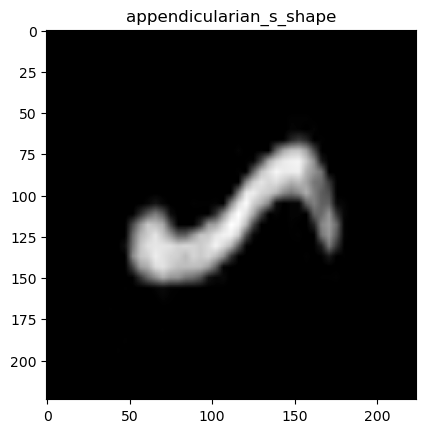

C:\Users\spbki\AppData\Local\Temp\ipykernel_21628\2814430667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(Counts)), y=Counts, palette="viridis")


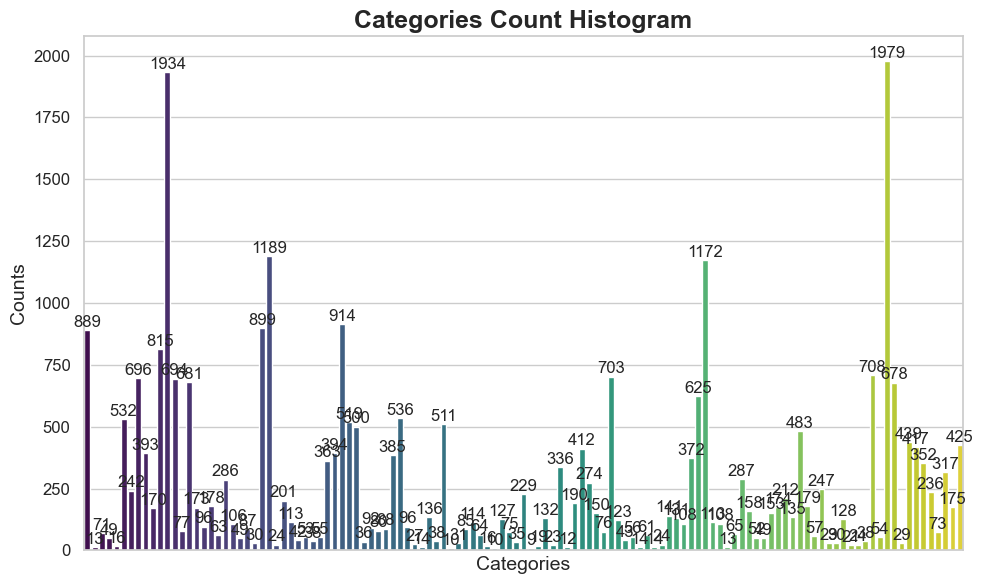

In [58]:
sns.reset_orig()
counter = Counter(Y)
PlantktonPlot(X[2137],Y[2137])
plt.show()
Classes = list(counter.keys())
Counts = list(counter.values())
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(len(Counts)), y=Counts, palette="viridis")
plt.title("Categories Count Histogram", fontsize=18, weight='bold')
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Counts", fontsize=14)
for i, count in enumerate(Counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)
plt.xticks([])
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
sns.reset_orig()

Widać, że wyzwaniem będzie mała liczba poszczególnych kategorii

In [60]:
Counts, Classes = zip(*sorted(zip(Counts, Classes)))
Counts = list(Counts)
Classes = list(Classes)
print(Counts)

[9, 10, 10, 12, 13, 13, 14, 14, 14, 16, 16, 19, 21, 23, 24, 24, 24, 27, 29, 29, 30, 30, 31, 35, 36, 38, 38, 38, 42, 43, 49, 49, 49, 52, 53, 54, 55, 56, 57, 61, 63, 64, 65, 71, 73, 75, 76, 77, 80, 85, 87, 88, 92, 96, 96, 106, 108, 108, 113, 113, 114, 123, 127, 128, 131, 132, 135, 136, 141, 150, 153, 158, 170, 173, 174, 175, 178, 179, 190, 201, 212, 229, 236, 242, 247, 274, 286, 287, 317, 336, 352, 363, 372, 385, 393, 394, 412, 417, 425, 439, 483, 500, 511, 519, 532, 536, 625, 678, 681, 694, 696, 703, 708, 815, 889, 899, 914, 1172, 1189, 1934, 1979]


Najczściej występujące planktony


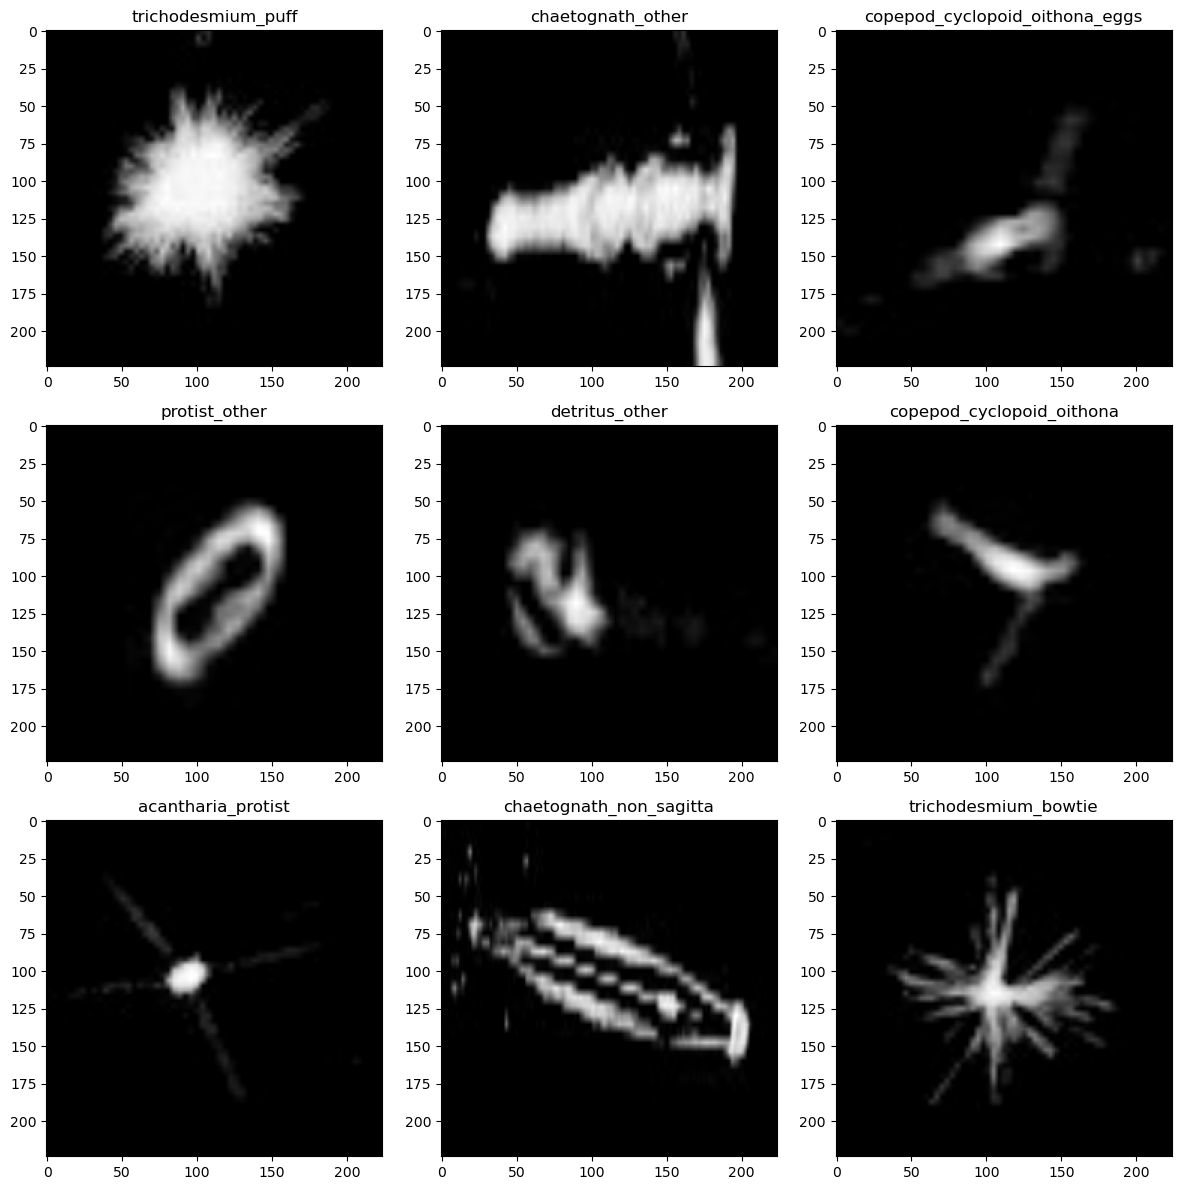

In [106]:
#More plotting, let's plot classes with a lot of elements!
print('Najczściej występujące planktony')
XExamples = []
YExamples = []
for i in range(1,10):
    XExamples.append(X[Y.index(Classes[-i])])
    YExamples.append(Y[Y.index(Classes[-i])])
plot_plankton_grid(XExamples, YExamples)

Najrzadziej występujące planktony


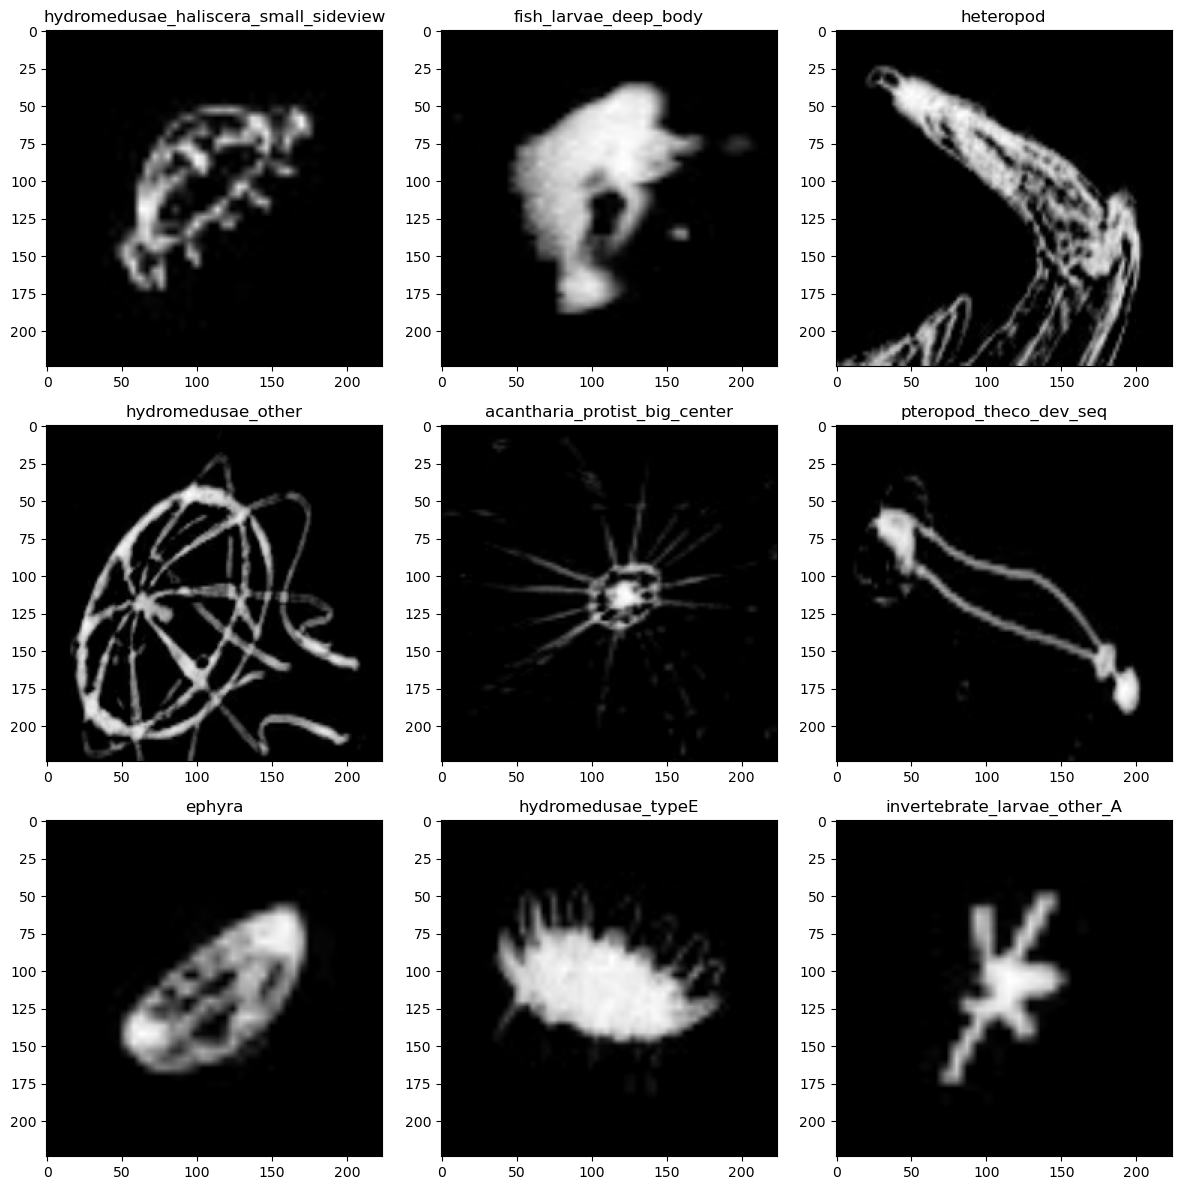

In [135]:
#More plotting, let's plot classes with a lot of elements!
print('Najrzadziej występujące planktony')
XExamples = []
YExamples = []
for i in range(0,9):
    XExamples.append(X[Y.index(Classes[i])])
    YExamples.append(Y[Y.index(Classes[i])])
plot_plankton_grid(XExamples, YExamples)

Teraz pora na testowanie augmentacji

In [212]:
Augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"), #lustrzane odbicie
    layers.RandomRotation(0.5),  # losowy obrót nawet o 180 stopni
    layers.RandomZoom(0.1), # losowy zoom +/- 10%
    layers.RandomTranslation(0.1, 0.1), #losowe przesunięcie
    layers.RandomContrast(0.1), #losowa zmiana jasności obrazka
])

Sprawdzam kształt i spojrze sobie na augmentacje!
(224, 224)


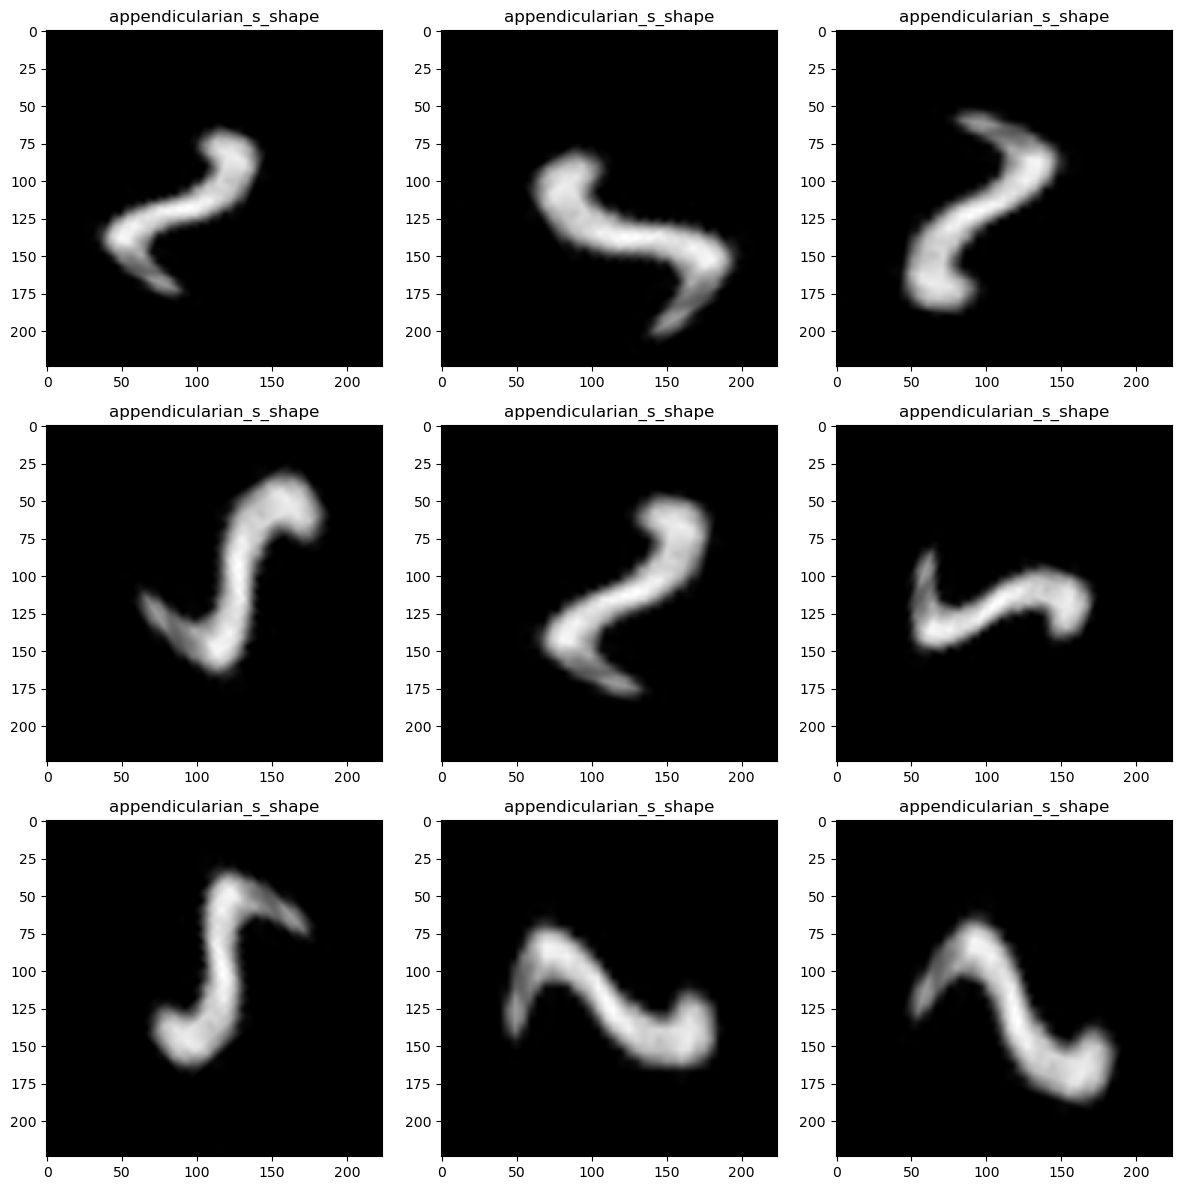

In [214]:
print('Sprawdzam kształt i spojrze sobie na augmentacje!')
print(Augmentation(X[2137]).numpy()[:,:,0].shape)
XExamples = []
YExamples = []
for i in range(0,9):
    XExamples.append(Augmentation(X[2137]).numpy()[:,:,0])
    YExamples.append(Y[2137])
plot_plankton_grid(XExamples, YExamples)